In [0]:
import numpy as np
import pandas as pd

## ***1) IMPORTING/LOADING DATA***

In [51]:
# IMPORTING DATASET 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# SPLITTING DATASET  

def split(df):
  """
  df: df with x,y value
  output:: two df of tuple  
  """
  x = df['text']
  y= df['senti']
  return (x,y)


#combinding dataset 
def combine(x,y):
  """
  df: df with x,y seperated
  output:: combined df  
  """
  
  df = pd.concat([x,y], axis =1 )

  return df  

train_x, train_y = split(train)
test_x, test_y = split(test)
train_x.shape #(13418,)
test_x.shape #(1491,)


(1491,)

## ***2) EXPLANATORY DATA ANALYSIS***

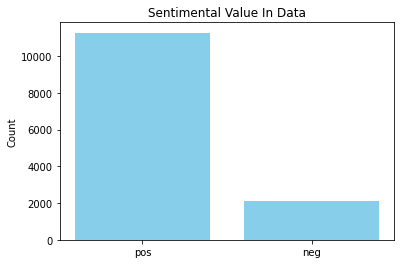

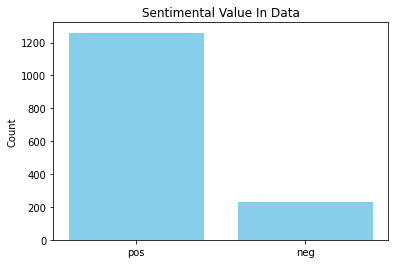

In [52]:
# EDA: EXPLANATORY DATA ANALYSIS 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

#train_y distribution 
label =['pos','neg']

def distribution_plot(df):
  """
  df: df with y value 
  output:: plot 
  """
  value = df.value_counts()
  plt.bar(label,value ,color='skyblue')
  plt.title('Sentimental Value In Data')
  plt.ylabel('Count')
  plt.show()

distribution_plot(train_y)
distribution_plot(test_y)

Both dataset are imbalanced : Can be balanced by...RESAMPLING 
- (1) Undersampling -Selecting pos data similar to neg data : info loss problem  
- (2) Oversampling - duplicating neg data : overfitting issue 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


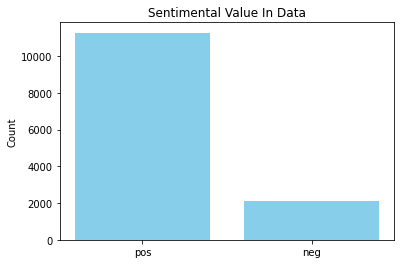

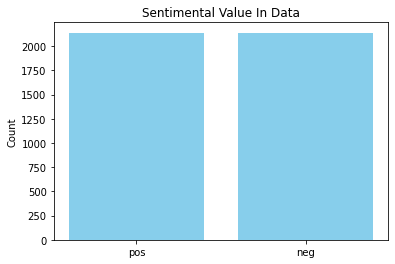

,text,senti
0,"I haven't owned a denim jacket since college, ...",pos
1,"Beautiful colors, especially the pink. i am 5'...",pos
2,Very pretty. love the design both front and back,pos
3,Love the jacket! so versatile! would probably ...,neg
4,I fell in love with this top when i first saw ...,pos
5,"I was so excited to wear this shirt, even afte...",neg
6,This dress is beautiful and surprisingly flatt...,pos
7,There's something majorly wrong with the way t...,neg
8,"Hi, i would have to agree with all of the revi...",neg
9,Fits very strange. odd cut. does not look well...,neg


In [53]:

#BALANCING DATASET
from sklearn.utils import shuffle

from imblearn.under_sampling import RandomUnderSampler

us = RandomUnderSampler(random_state = 12 )

def undersample_data(df):
  """
  input:: df with neg, pos ; original train/test set 
  output:: undersampled x, y 
  """
  x,y = split(df)

  undersample_list, undersample_y = us.fit_resample(df,y) #y is the label data
  #undersample_list is a list with data,label 

  #make list into a df 
  undersample_df = pd.DataFrame(undersample_list, columns = df.columns)
  #shuffle to make order random 
  undersample_df =shuffle(undersample_df,random_state =12)
  undersample_df.reset_index(inplace=True, drop=True)


  return undersample_df

undersample_new= undersample_data(train)

#first plot is not oversampled dataset
distribution_plot(train_y)

# #distribution plot 
distribution_plot(undersample_new['senti'])

undersample_new.head(10)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


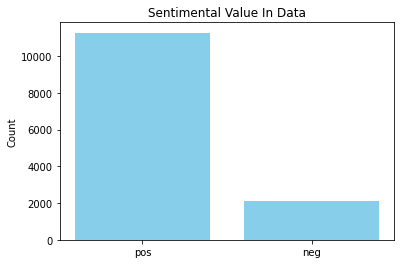

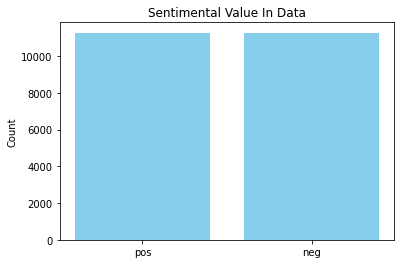

,text,senti
0,"Wow, this dress is so incredibly designed and ...",pos
1,"Ugh, i hate that this didn't work! the top sho...",neg
2,I own another dolan dress which is virtually t...,pos
3,I waited to review as i ordered both colors an...,pos
4,"I'll admit, i had a lot of sticker shock when ...",pos
5,This top is true to size and fits perfectly. ...,pos
6,Such a lovely shirt and even though it is whit...,pos
7,"Great, lightweight pants for summer!!! size do...",pos
8,I've been looking at these for some time and i...,pos
9,Wide fit. usually an 8-10 at retailer. got a l...,pos


In [54]:
#Over sample using RandomOverSampler : duplicating dataset 

from imblearn.over_sampling import RandomOverSampler 
oversample = RandomOverSampler(random_state = 12)
from sklearn.utils import shuffle



def over_sample_data(df):
  """input:: data of train/test original dataset 
  
  output:: oversampled dataset splitted into x and y """


  x,y = split(df)


  oversample_list, oversample_y = oversample.fit_resample(df,y) #y is the label data
  #oversample_list is a list with data,label 

  #make list into a df 
  oversample_df = pd.DataFrame(oversample_list, columns = df.columns)

  #shuffle since the order is pos..neg 
  oversample_df =shuffle(oversample_df,random_state =12)
  oversample_df.reset_index(inplace=True, drop=True) #reset index
  
  return oversample_df


# #Experiment function 
oversampled_train= over_sample_data(train)

#first plot is not oversampled dataset
distribution_plot(train_y)


#second plot is oversampled dataset 
distribution_plot(oversampled_train['senti']) 
oversampled_train.head(20) #now it is mixed 

## ***3) PREPROCESSING DATA***

In [55]:
#PREPROCESSING 



#before vectorizing data : preprocess 
# import nltk
# nltk.download('stopwords')

from nltk import word_tokenize

from nltk.corpus import stopwords

import re 


def preprocess_data(df):
  """input:: input x dataset ,y dataset (combined dataset __ex: train )

  output:: cleaned x dataset/label combined   """

  x,y = split(df)

  newx = []
  for rownum,line in enumerate(x): #string data 
    #make string with lower cases 
    line = line.strip().lower()
    # print(line)

    #delete seperation in sentence 
    line = re.sub(pattern = '\r*\n',repl=' ',string = line) 
    # print('original: '+ line)

    #delete sentence starting with one word 
    line = re.sub(pattern = r'^[a-z]{1}\s',repl='',string = line)
    # print('1: '+line)

    # #delete info about height , weight , breast size
    
    line = re.sub(pattern = r'\d\'\s*\d*[\"\']*',repl=' ',string = line)  #height 
    line = re.sub(pattern = r'[01234567890]+\s{0,1}lbs{0,1}',repl=' ',string = line)  #weight 
    line = re.sub(pattern = r'[01234567890]+\w', repl='',string =line ) #size
    # print('2: '+line)

    # #delete non-words
    line = re.sub(pattern = r'[\W]',repl=' ',string = line) 
    # print('3: '+line)
    
    # #delete numbers : any digit
    line = re.sub(pattern = r'[1234567890]+',repl=' ',string = line)
    # print('4: '+line)
    

    # delete one-letter
    line = re.sub(pattern = r'\b[a-z]\b',repl=' ',string = line)
    # print('5: '+line)

    # delete two or more blank 
    line = re.sub(pattern = r'\s{2,}',repl=' ',string = line)
    # print('6: '+line)

    # delete __
    line = re.sub(pattern = r'_{1,}',repl=' ',string = line)
    
    newx.append(line)


  newx = pd.Series(newx) 
  df = pd.concat([newx,y], axis =1)
  df.rename(columns = {0: 'text'}, inplace = True)
  

  return df #cleaned dataset combined with data,label 

#example 
clean_train =preprocess_data(train)
clean_test =preprocess_data(test)
clean_train['text'].head(10)
clean_test['text'].head(10)

0    have to disagree with previous posters found j...
1    love everything about this top first it super ...
2    this dress has marilyn feel to it felt like dream
3    these cords are great the fit the style everyt...
4    this top fit perfectly but too much of my bra ...
5    it is very comfortable and the fabric is amazi...
6    these jeans are one of my all time favorite ag...
7    this is great jacket for fall layering love th...
8    just received this in the mail today and haven...
9    this piece is gorgeous in person it is more of...
Name: text, dtype: object

In [56]:
#preprocess on y_train

from sklearn import preprocessing


def label_encoding(df):
  """input:: label y df (train/testy) 
  
  output:: label encoded df of y"""
  encode = preprocessing.LabelEncoder()
  # print(df)
  df= encode.fit_transform(df)
  # print(df) pos:1 

  return df  




label_encoding(train_y) #array of one column np.ndarray 


array([1, 1, 1, ..., 1, 0, 1])

  ## ***4) VECTORIZING DATA***

In [57]:
#vectorizing dataset in various ways :: tfidf, tf, tfbigram, one-hot encoding 

from sklearn.feature_extraction.text import CountVectorizer
tf = CountVectorizer( stop_words='english') #delete stop words in dataset 
onehot = CountVectorizer( stop_words='english', binary=True)
bigram_tf = CountVectorizer( stop_words='english', ngram_range=(2,2))

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')

def vectorize_data(train,test,condition):
  """input:: combinded cleaned dataset including(x,y) of train/test , condition : tf, onehot, bigram, tfidf

  output:: vectorized dataset x, label y combined (tf, tfdif one-hot encoding ordered ) """

  #split the dataset first 
  train_x,train_y = split(train)
  test_x, test_y = split(test)

  ##USING TF COUNT VECTORIZER 

  if condition == 'tf':

    tf_train_x = tf.fit_transform(train_x)
  # print(tf.vocabulary_)

    tf_train_x_array = tf_train_x.toarray()
  # print(tf_train_x_array)
  # print(tf_train_x_array.shape)
    tf_test_x = tf.transform(test_x)
    tf_test_x_array = tf_test_x.toarray()

  # print(tf_test_x_array)
  # print(tf_test_x_array.sum(axis=0)[10:20]) not zero : works 
  # print(tf_test_x_array.shape)

  #final: tf_train_x_array,tf_test_x_array

    train_array = tf_train_x_array
    test_array = tf_test_x_array


  elif condition == 'bigram': #too big process -- not use 
  ##USING BIGRAM VECTORIZER 

    bigram_tf_train_x = bigram_tf.fit_transform(train_x)
    bigram_tf_train_x_array = bigram_tf_train_x.toarray()
    bigram_tf_test_x = bigram_tf.transform(test_x)
    bigram_tf_test_x_array = bigram_tf_test_x.toarray()

  #final: bigram_tf_train_x_array,bigram_tf_test_x_array

    train_array = bigram_tf_train_x_array
    test_array = bigram_tf_test_x_array

  ##USING TFIDF VECTORIZER 

  elif condition == 'tfidf':

    tfidf_train_x = tfidf.fit_transform(train_x)
    tfidf_train_x_array = tfidf_train_x.toarray()
    tfidf_test_x = tfidf.transform(test_x)
    tfidf_test_x_array = tfidf_test_x.toarray()

  #final: tfidf_train_x_array,tfidf_test_x_array

    train_array = tfidf_train_x_array
    test_array = tfidf_test_x_array

  ##USING ONEHOT VECTORIZER 

  elif condition == 'onehot':

    onehot_train_x = onehot.fit_transform(train_x)
    onehot_train_x_array = onehot_train_x.toarray()
    onehot_test_x = onehot.transform(test_x)
    onehot_test_x_array = onehot_test_x.toarray()

  #final : onehot_train_x_array, onehot_test_x_array

    train_array = onehot_train_x_array
    test_array = onehot_test_x_array


  #returns X_array of train/test +  y label  : vectorized arrays 
  return train_array,train_y , test_array,  test_y 
  

# experiment function 
tf_train,train_y, tf_test , test_y = vectorize_data(clean_train,clean_test,'tf')

train_y.shape #(13418,) ; obs is 13418 
tf_train.shape #(13418,10560) ;there are 10560 words in the dataset of train 


(13418, 10552)

## ***5) MODELING DATA***

In [58]:
#MODELING FUNCTION
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import LinearSVC



#example 
tfidf_train,train_y, tfidf_test, test_y = vectorize_data(clean_train,clean_test,'tfidf')

def modeling_data(train_x, train_y, test_x, test_y,condition):
  """input:: vectorized trainset of x,y, test set of each, condition will be machine learning techniques: naviebaye(nb), logistic regression(lr).. decision tree(dt)...

  output:: f1_score """

  #split dataset with validation dataset 
  # train_x, val_x, train_y, val_y = train_test_split(train_x, train_y,train_size =.7 , random_state=123)
  # print(train_x.shape)
  # print(val_x.shape)
  # print(train_y.shape)
  # print(val_y.shape)

  label_train = label_encoding(train_y) #1,0 presentation 
  # label_train = label_encoding(val_y)  
  label_test = label_encoding(test_y)

  if condition == 'nb': #not need to be scaled 
    clt = MultinomialNB( alpha = .35)
    clt.fit(train_x,label_train)
    # print(cross_val_score(clt, train_x, train_y, cv=5).mean() )
    # pred = clt.predict(test_x)
    # f1 = metrics.f1_score(test_y,pred,average='macro') 
    # print(classification_report(test_y, predictions))

    return test_x, label_test , clt 

    

  elif condition == 'lr': #lr needs to be scaled 
    
    scaler = StandardScaler()
    train_x = scaler.fit_transform(train_x)
    test_x =scaler.fit_transform(test_x)

    lr = LogisticRegression(max_iter=15000 )
    lr.fit(train_x,label_train)
    # pred = lr.predict(test_x)
    # f1 = metrics.f1_score(label_test,pred,average='macro') 
    # print(classification_report(test_y, predictions))
    return test_x, label_test , lr #use labeled dataset 
 
  #too much process needed ;; 

  elif condition == 'svm': #needs to be scaled
    scaler = StandardScaler() 
    train_x = scaler.fit_transform(train_x)
    test_x =scaler.fit_transform(test_x)

    clf = LinearSVC(C=.01)
    clf.fit(train_x, label_train) #label train contains 0,1 
    # pred = clf.predict(test_x)
    # f1 = metrics.f1_score(label_test,pred,average='macro') 
    # print(classification_report(test_y, predictions))

    return test_x, label_test , clf




#usage example 

print(modeling_data(tfidf_train,train_y, tfidf_test, test_y,'nb'))


(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([1, 1, 1, ..., 1, 1, 1]), MultinomialNB(alpha=0.35, class_prior=None, fit_prior=True))


In [0]:
#USE DEEPLEARNING 
# !pip install keras
from sklearn.metrics import classification_report

#since binary classification last node needs to be sigmoid 
from keras import models
from keras import layers

def deep_learning(train_x,train_y, test_x, test_y):

  label_train = label_encoding(train_y) #1,0 presentation 
  label_test = label_encoding(test_y)
  label_train = np.asarray(label_train).astype('float32')
  label_test = np.asarray(label_test).astype('float32')

  #scale dataset 
  scaler = StandardScaler()
  train_x = scaler.fit_transform(train_x)
  test_x =scaler.fit_transform(test_x)


  num = int(train_x.shape[0])
  x_val = train_x[-num:]
  y_val = label_train[-num:]
  x_train = train_x[:-num]
  y_train = label_train[:-num]

  
  
  model = models.Sequential()
  
  model.add(layers.Dense(500, activation = 'relu', input_shape = (train_x.shape[1],))) #input layer :needs specific input_shape 
  model.add(layers.Dense(100,activation='relu')) #hidden layer using relu 
  model.add(layers.Dense(10,activation='relu')) #hidden layer using relu 
  model.add(layers.Dense(1,activation = 'sigmoid')) #output layer(binary  1): using sigmoid 0 or 1 

  
  model.compile(optimizer = 'adadelta', loss= 'binary_crossentropy', metrics =['accuracy'])

  history = model.fit(train_x, label_train, epochs=5, batch_size= 512, validation_data=(x_val, y_val) )



  history_dict = history.history
  history_dict.keys()
  acc= history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1,len(acc)+1)
  plt.plot(epochs, acc, 'r', label = 'Training accuracy')
  plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()


  prediction_y = model.predict_classes(test_x, verbose= 0) 
  # print(prediction_y)
  print(classification_report(label_test, prediction_y)) 


  # return classification_report(label_test, prediction_y)

#example :: 
# deep_learning(tfidf_train,train_y, tfidf_test, test_y)

## ***6) EVALUATION***

In [0]:
from sklearn.metrics import classification_report
#EVALUATION 
def evaluate(test_x,test_y,model):
  predictions = model.predict(test_x)
  # print(predictions)
  # print(predictions.shape)
  print(classification_report(test_y, predictions)) #evaluation function

#example 
# evaluate(test_x, test_y, model)


## ***7) APPLICATION TO DATA***

*(1) ORIGINAL dataset*

In [0]:

#try on original dataset where no oversample/undersample is done 

clean_train =preprocess_data(train)
clean_test =preprocess_data(test)

#DIFFERENCE IN VECTORIZING DATASET 
tf_train,train_y, tf_test , test_y = vectorize_data(clean_train,clean_test,'tf')
tfidf_train,train_y, tfidf_test , test_y = vectorize_data(clean_train,clean_test,'tfidf')
onehot_train,train_y, onehot_test , test_y = vectorize_data(clean_train,clean_test,'onehot')



In [62]:
#MODELING DATASET :: tf_data 
test_x, test_y, model =modeling_data(tf_train,train_y, tf_test , test_y,'nb')
nb_tf = evaluate(test_x, test_y, model)

test_x, test_y, model =modeling_data(tf_train,train_y, tf_test , test_y,'lr')
lr_tf = evaluate(test_x, test_y, model)


test_x, test_y, model =modeling_data(tf_train,train_y, tf_test , test_y,'svm')
svm_tfidf = evaluate(test_x, test_y, model)

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       231
           1       0.97      0.97      0.97      1260

    accuracy                           0.95      1491
   macro avg       0.91      0.91      0.91      1491
weighted avg       0.95      0.95      0.95      1491

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       231
           1       0.95      0.96      0.95      1260

    accuracy                           0.92      1491
   macro avg       0.85      0.83      0.84      1491
weighted avg       0.92      0.92      0.92      1491

              precision    recall  f1-score   support

           0       0.57      0.81      0.67       231
           1       0.96      0.89      0.92      1260

    accuracy                           0.88      1491
   macro avg       0.77      0.85      0.80      1491
weighted avg       0.90      0.88      0.88      1491



In [63]:
#MODELING DATASET :: tfidf_data 
test_x, test_y, model =modeling_data(tfidf_train,train_y, tfidf_test , test_y,'nb')
nb_tfidf = evaluate(test_x, test_y, model)

test_x, test_y, model =modeling_data(tfidf_train,train_y, tfidf_test , test_y,'lr')
lr_tfidf = evaluate(test_x, test_y, model)


test_x, test_y, model =modeling_data(tfidf_train,train_y, tfidf_test , test_y,'svm')
svm_tfidf = evaluate(test_x, test_y, model)


              precision    recall  f1-score   support

           0       0.96      0.30      0.46       231
           1       0.89      1.00      0.94      1260

    accuracy                           0.89      1491
   macro avg       0.92      0.65      0.70      1491
weighted avg       0.90      0.89      0.86      1491

              precision    recall  f1-score   support

           0       0.78      0.68      0.73       231
           1       0.94      0.97      0.95      1260

    accuracy                           0.92      1491
   macro avg       0.86      0.82      0.84      1491
weighted avg       0.92      0.92      0.92      1491

              precision    recall  f1-score   support

           0       0.58      0.78      0.66       231
           1       0.96      0.89      0.92      1260

    accuracy                           0.88      1491
   macro avg       0.77      0.84      0.79      1491
weighted avg       0.90      0.88      0.88      1491



In [64]:
#MODELING DATASET :: onehot_data 
test_x, test_y, model =modeling_data(onehot_train,train_y, onehot_test , test_y ,'nb')
nb_onehot = evaluate(test_x, test_y, model)

test_x, test_y, model =modeling_data(onehot_train,train_y, onehot_test , test_y ,'lr')
lr_onehot = evaluate(test_x, test_y, model)


test_x, test_y, model =modeling_data(onehot_train,train_y, onehot_test , test_y ,'svm')
svm_onehot = evaluate(test_x, test_y, model)


              precision    recall  f1-score   support

           0       0.85      0.83      0.84       231
           1       0.97      0.97      0.97      1260

    accuracy                           0.95      1491
   macro avg       0.91      0.90      0.90      1491
weighted avg       0.95      0.95      0.95      1491

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       231
           1       0.95      0.96      0.95      1260

    accuracy                           0.92      1491
   macro avg       0.85      0.83      0.84      1491
weighted avg       0.91      0.92      0.92      1491

              precision    recall  f1-score   support

           0       0.59      0.83      0.69       231
           1       0.97      0.90      0.93      1260

    accuracy                           0.88      1491
   macro avg       0.78      0.86      0.81      1491
weighted avg       0.91      0.88      0.89      1491



Train on 13418 samples, validate on 13418 samples
Epoch 1/5
13418/13418 [==============================] - 6s 451us/step - loss: 0.3557 - accuracy: 0.8717 - val_loss: 0.0816 - val_accuracy: 0.9827
Epoch 2/5
13418/13418 [==============================] - 6s 424us/step - loss: 0.0666 - accuracy: 0.9814 - val_loss: 0.0315 - val_accuracy: 0.9941
Epoch 3/5
13418/13418 [==============================] - 6s 427us/step - loss: 0.0265 - accuracy: 0.9933 - val_loss: 0.0147 - val_accuracy: 0.9970
Epoch 4/5
13418/13418 [==============================] - 6s 423us/step - loss: 0.0139 - accuracy: 0.9968 - val_loss: 0.0088 - val_accuracy: 0.9983
Epoch 5/5
13418/13418 [==============================] - 6s 419us/step - loss: 0.0085 - accuracy: 0.9980 - val_loss: 0.0068 - val_accuracy: 0.9993


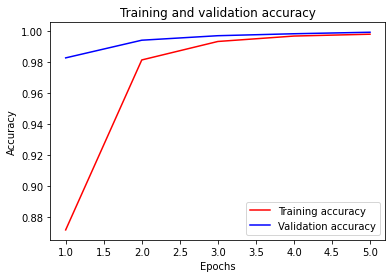

              precision    recall  f1-score   support

         0.0       0.72      0.84      0.78       231
         1.0       0.97      0.94      0.95      1260

    accuracy                           0.92      1491
   macro avg       0.85      0.89      0.87      1491
weighted avg       0.93      0.92      0.93      1491

Train on 13418 samples, validate on 13418 samples
Epoch 1/5
13418/13418 [==============================] - 6s 422us/step - loss: 0.3396 - accuracy: 0.8793 - val_loss: 0.0695 - val_accuracy: 0.9854
Epoch 2/5
13418/13418 [==============================] - 5s 405us/step - loss: 0.0523 - accuracy: 0.9853 - val_loss: 0.0196 - val_accuracy: 0.9965
Epoch 3/5
13418/13418 [==============================] - 5s 407us/step - loss: 0.0178 - accuracy: 0.9960 - val_loss: 0.0094 - val_accuracy: 0.9983
Epoch 4/5
13418/13418 [==============================] - 5s 406us/step - loss: 0.0087 - accuracy: 0.9982 - val_loss: 0.0053 - val_accuracy: 0.9991
Epoch 5/5
13418/13418 [============

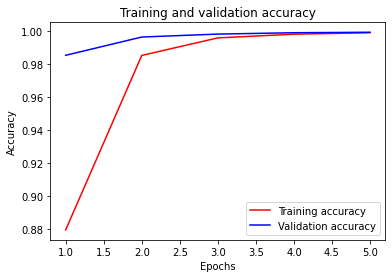

              precision    recall  f1-score   support

         0.0       0.75      0.82      0.78       231
         1.0       0.97      0.95      0.96      1260

    accuracy                           0.93      1491
   macro avg       0.86      0.89      0.87      1491
weighted avg       0.93      0.93      0.93      1491

Train on 13418 samples, validate on 13418 samples
Epoch 1/5
13418/13418 [==============================] - 6s 442us/step - loss: 0.3595 - accuracy: 0.8526 - val_loss: 0.1569 - val_accuracy: 0.9700
Epoch 2/5
13418/13418 [==============================] - 6s 437us/step - loss: 0.0928 - accuracy: 0.9721 - val_loss: 0.0355 - val_accuracy: 0.9920
Epoch 3/5
13418/13418 [==============================] - 6s 437us/step - loss: 0.0302 - accuracy: 0.9911 - val_loss: 0.0157 - val_accuracy: 0.9959
Epoch 4/5
13418/13418 [==============================] - 6s 436us/step - loss: 0.0148 - accuracy: 0.9959 - val_loss: 0.0090 - val_accuracy: 0.9981
Epoch 5/5
13418/13418 [============

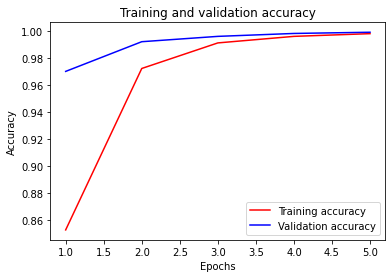

              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81       231
         1.0       0.96      0.97      0.96      1260

    accuracy                           0.94      1491
   macro avg       0.89      0.88      0.89      1491
weighted avg       0.94      0.94      0.94      1491



In [65]:

#MODELING DATASET :: tf_data - deeplearning 

deep_learning(tf_train,train_y, tf_test , test_y)

#MODELING DATASET :: tfidf_data - deeplearning 

deep_learning(tfidf_train,train_y, tfidf_test , test_y)

#MODELING DATASET :: onehot_data - deeplearning 
deep_learning(onehot_train,train_y, onehot_test , test_y )


# **ORIGINAL DATASET ::  IMBALANCED**


**ML BEST:: tf - NB ::RESULTING 0.90 -> .91 by updating parameters**


---


**DL:: tfidf  ::RESULTING .83 -> ,89 by updating paraters**

*(2) Undersampled dataset*

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


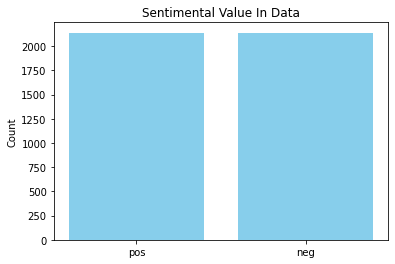

,text,senti
0,haven owned denim jacket since college but fel...,pos
1,beautiful colors especially the pink am and ab...,pos
2,very pretty love the design both front and back,pos
3,love the jacket so versatile would probably or...,neg
4,fell in love with this top when first saw it i...,pos
5,was so excited to wear this shirt even after r...,neg
6,this dress is beautiful and surprisingly flatt...,pos
7,there something majorly wrong with the way the...,neg
8,hi would have to agree with all of the reviewe...,neg
9,fits very strange odd cut does not look well on,neg


In [66]:
#USING UNDERSAMPLING 
undersample_train= undersample_data(train)
distribution_plot(undersample_train['senti'])
#EQUAL PREPROCESSING STAGE 
clean_train =preprocess_data(undersample_train)
clean_test =preprocess_data(test)

#DIFFERENCE IN VECTORIZING DATASET 
tf_train,train_y, tf_test , test_y = vectorize_data(clean_train,clean_test,'tf')
tfidf_train,train_y, tfidf_test , test_y = vectorize_data(clean_train,clean_test,'tfidf')
onehot_train,train_y, onehot_test , test_y = vectorize_data(clean_train,clean_test,'onehot')


clean_train.head(10)

In [67]:
#MODELING DATASET :: tf_data 
test_x, test_y, model =modeling_data(tf_train,train_y, tf_test , test_y,'nb')
nb_tf = evaluate(test_x, test_y, model)

test_x, test_y, model =modeling_data(tf_train,train_y, tf_test , test_y,'lr')
lr_tf = evaluate(test_x, test_y, model)


test_x, test_y, model =modeling_data(tf_train,train_y, tf_test , test_y,'svm')
svm_tf = evaluate(test_x, test_y, model)


              precision    recall  f1-score   support

           0       0.65      0.93      0.77       231
           1       0.99      0.91      0.95      1260

    accuracy                           0.91      1491
   macro avg       0.82      0.92      0.86      1491
weighted avg       0.93      0.91      0.92      1491

              precision    recall  f1-score   support

           0       0.35      0.95      0.52       231
           1       0.99      0.68      0.81      1260

    accuracy                           0.72      1491
   macro avg       0.67      0.82      0.66      1491
weighted avg       0.89      0.72      0.76      1491

              precision    recall  f1-score   support

           0       0.35      0.95      0.51       231
           1       0.99      0.68      0.80      1260

    accuracy                           0.72      1491
   macro avg       0.67      0.81      0.66      1491
weighted avg       0.89      0.72      0.76      1491



In [68]:
#MODELING DATASET :: tfidf_data 
test_x, test_y, model =modeling_data(tfidf_train,train_y, tfidf_test , test_y,'nb')
nb_tfidf = evaluate(test_x, test_y, model)

test_x, test_y, model =modeling_data(tfidf_train,train_y, tfidf_test , test_y,'lr')
lr_tfidf = evaluate(test_x, test_y, model)


test_x, test_y, model =modeling_data(tfidf_train,train_y, tfidf_test , test_y,'svm')
svm_tfidf = evaluate(test_x, test_y, model)


              precision    recall  f1-score   support

           0       0.66      0.93      0.77       231
           1       0.99      0.91      0.95      1260

    accuracy                           0.91      1491
   macro avg       0.82      0.92      0.86      1491
weighted avg       0.93      0.91      0.92      1491

              precision    recall  f1-score   support

           0       0.35      0.96      0.51       231
           1       0.99      0.67      0.80      1260

    accuracy                           0.72      1491
   macro avg       0.67      0.82      0.66      1491
weighted avg       0.89      0.72      0.76      1491

              precision    recall  f1-score   support

           0       0.34      0.94      0.50       231
           1       0.98      0.67      0.79      1260

    accuracy                           0.71      1491
   macro avg       0.66      0.80      0.65      1491
weighted avg       0.88      0.71      0.75      1491



In [69]:
#MODELING DATASET :: onehot_data 
test_x, test_y, model =modeling_data(onehot_train,train_y, onehot_test , test_y ,'nb')
nb_onehot = evaluate(test_x, test_y, model)

test_x, test_y, model =modeling_data(onehot_train,train_y, onehot_test , test_y ,'lr')
lr_onehot = evaluate(test_x, test_y, model)


test_x, test_y, model =modeling_data(onehot_train,train_y, onehot_test , test_y ,'svm')
svm_onehot = evaluate(test_x, test_y, model)


              precision    recall  f1-score   support

           0       0.65      0.94      0.77       231
           1       0.99      0.91      0.95      1260

    accuracy                           0.91      1491
   macro avg       0.82      0.92      0.86      1491
weighted avg       0.93      0.91      0.92      1491

              precision    recall  f1-score   support

           0       0.35      0.97      0.52       231
           1       0.99      0.68      0.80      1260

    accuracy                           0.72      1491
   macro avg       0.67      0.82      0.66      1491
weighted avg       0.89      0.72      0.76      1491

              precision    recall  f1-score   support

           0       0.35      0.95      0.51       231
           1       0.99      0.68      0.80      1260

    accuracy                           0.72      1491
   macro avg       0.67      0.81      0.66      1491
weighted avg       0.89      0.72      0.76      1491



Train on 4278 samples, validate on 4278 samples
Epoch 1/5
4278/4278 [==============================] - 1s 295us/step - loss: 0.6343 - accuracy: 0.6758 - val_loss: 0.2472 - val_accuracy: 0.9624
Epoch 2/5
4278/4278 [==============================] - 1s 254us/step - loss: 0.1964 - accuracy: 0.9635 - val_loss: 0.0828 - val_accuracy: 0.9909
Epoch 3/5
4278/4278 [==============================] - 1s 257us/step - loss: 0.0689 - accuracy: 0.9899 - val_loss: 0.0404 - val_accuracy: 0.9963
Epoch 4/5
4278/4278 [==============================] - 1s 251us/step - loss: 0.0366 - accuracy: 0.9951 - val_loss: 0.0250 - val_accuracy: 0.9979
Epoch 5/5
4278/4278 [==============================] - 1s 252us/step - loss: 0.0233 - accuracy: 0.9977 - val_loss: 0.0173 - val_accuracy: 0.9981


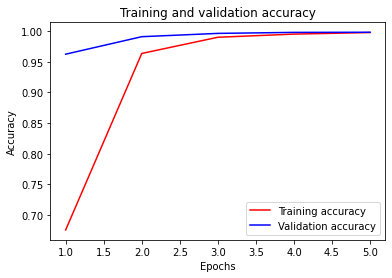

              precision    recall  f1-score   support

         0.0       0.38      0.97      0.54       231
         1.0       0.99      0.71      0.82      1260

    accuracy                           0.75      1491
   macro avg       0.68      0.84      0.68      1491
weighted avg       0.90      0.75      0.78      1491

Train on 4278 samples, validate on 4278 samples
Epoch 1/5
4278/4278 [==============================] - 1s 281us/step - loss: 0.6508 - accuracy: 0.6351 - val_loss: 0.3694 - val_accuracy: 0.9007
Epoch 2/5
4278/4278 [==============================] - 1s 261us/step - loss: 0.2555 - accuracy: 0.9301 - val_loss: 0.2333 - val_accuracy: 0.8997
Epoch 3/5
4278/4278 [==============================] - 1s 257us/step - loss: 0.0842 - accuracy: 0.9771 - val_loss: 0.0272 - val_accuracy: 0.9963
Epoch 4/5
4278/4278 [==============================] - 1s 253us/step - loss: 0.0245 - accuracy: 0.9963 - val_loss: 0.0145 - val_accuracy: 0.9986
Epoch 5/5
4278/4278 [========================

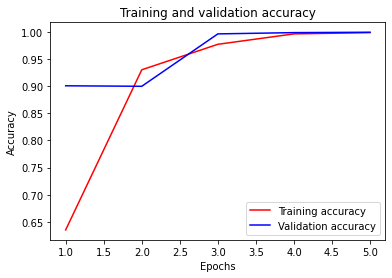

              precision    recall  f1-score   support

         0.0       0.38      0.97      0.55       231
         1.0       0.99      0.71      0.83      1260

    accuracy                           0.75      1491
   macro avg       0.69      0.84      0.69      1491
weighted avg       0.90      0.75      0.78      1491

Train on 4278 samples, validate on 4278 samples
Epoch 1/5
4278/4278 [==============================] - 1s 281us/step - loss: 0.6475 - accuracy: 0.6625 - val_loss: 0.2336 - val_accuracy: 0.9614
Epoch 2/5
4278/4278 [==============================] - 1s 258us/step - loss: 0.1877 - accuracy: 0.9596 - val_loss: 0.0772 - val_accuracy: 0.9895
Epoch 3/5
4278/4278 [==============================] - 1s 263us/step - loss: 0.0675 - accuracy: 0.9899 - val_loss: 0.0386 - val_accuracy: 0.9963
Epoch 4/5
4278/4278 [==============================] - 1s 253us/step - loss: 0.0357 - accuracy: 0.9960 - val_loss: 0.0242 - val_accuracy: 0.9984
Epoch 5/5
4278/4278 [========================

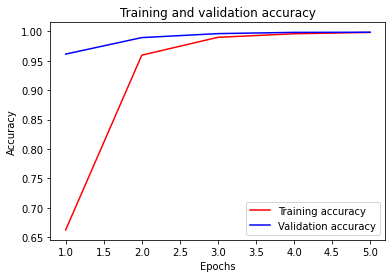

              precision    recall  f1-score   support

         0.0       0.36      0.98      0.53       231
         1.0       0.99      0.69      0.81      1260

    accuracy                           0.73      1491
   macro avg       0.68      0.83      0.67      1491
weighted avg       0.90      0.73      0.77      1491



In [70]:
#UNDERSAMPLE DATASET 
#MODELING DATASET :: tf_data - deeplearning 

deep_learning(tf_train,train_y, tf_test , test_y)

#MODELING DATASET :: tfidf_data - deeplearning 

deep_learning(tfidf_train,train_y, tfidf_test , test_y)

#MODELING DATASET :: onehot_data - deeplearning 
deep_learning(onehot_train,train_y, onehot_test , test_y )


# **UNDERSAMPLING::  DATA LOSS**


**ML BEST:: NB ::RESULTING .86**


---


**DL:: tfidf ENCODING ::RESULTING .69**

*(3) OVERsampled data*

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


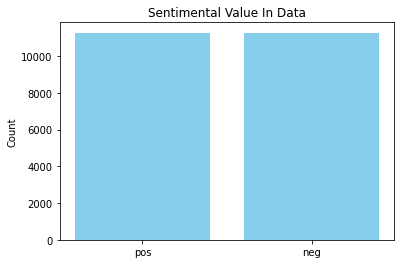

,text,senti
0,"Wow, this dress is so incredibly designed and ...",pos
1,"Ugh, i hate that this didn't work! the top sho...",neg
2,I own another dolan dress which is virtually t...,pos
3,I waited to review as i ordered both colors an...,pos
4,"I'll admit, i had a lot of sticker shock when ...",pos
5,This top is true to size and fits perfectly. ...,pos
6,Such a lovely shirt and even though it is whit...,pos
7,"Great, lightweight pants for summer!!! size do...",pos
8,I've been looking at these for some time and i...,pos
9,Wide fit. usually an 8-10 at retailer. got a l...,pos


In [71]:
#USING OVERSAMPLING 
oversample_train= over_sample_data(train)
distribution_plot(oversample_train['senti'])
#EQUAL PREPROCESSING STAGE 

clean_train =preprocess_data(oversample_train)
clean_test =preprocess_data(test)

#DIFFERENCE IN VECTORIZING DATASET 
tf_train,train_y, tf_test , test_y = vectorize_data(clean_train,clean_test,'tf')
tfidf_train,train_y, tfidf_test , test_y = vectorize_data(clean_train,clean_test,'tfidf')
onehot_train,train_y, onehot_test , test_y = vectorize_data(clean_train,clean_test,'onehot')


oversample_train.head(10)

In [72]:
#MODELING DATASET :: tf_data 
test_x, test_y, model =modeling_data(tf_train,train_y, tf_test , test_y,'nb')
nb_tf = evaluate(test_x, test_y, model)

test_x, test_y, model =modeling_data(tf_train,train_y, tf_test , test_y,'lr')
lr_tf = evaluate(test_x, test_y, model)



test_x, test_y, model =modeling_data(tf_train,train_y, tf_test , test_y,'svm')
svm_tfidf = evaluate(test_x, test_y, model)


              precision    recall  f1-score   support

           0       0.77      0.87      0.82       231
           1       0.98      0.95      0.96      1260

    accuracy                           0.94      1491
   macro avg       0.87      0.91      0.89      1491
weighted avg       0.94      0.94      0.94      1491

              precision    recall  f1-score   support

           0       0.42      0.94      0.58       231
           1       0.98      0.77      0.86      1260

    accuracy                           0.79      1491
   macro avg       0.70      0.85      0.72      1491
weighted avg       0.90      0.79      0.82      1491

              precision    recall  f1-score   support

           0       0.39      0.94      0.55       231
           1       0.98      0.73      0.84      1260

    accuracy                           0.76      1491
   macro avg       0.69      0.83      0.69      1491
weighted avg       0.89      0.76      0.79      1491



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [73]:
#MODELING DATASET :: tfidf_data 
test_x, test_y, model =modeling_data(tfidf_train,train_y, tfidf_test , test_y,'nb')
nb_tfidf = evaluate(test_x, test_y, model)

test_x, test_y, model =modeling_data(tfidf_train,train_y, tfidf_test , test_y,'lr')
lr_tfidf = evaluate(test_x, test_y, model)



test_x, test_y, model =modeling_data(tfidf_train,train_y, tfidf_test , test_y,'svm')
svm_tfidf = evaluate(test_x, test_y, model)



              precision    recall  f1-score   support

           0       0.73      0.89      0.80       231
           1       0.98      0.94      0.96      1260

    accuracy                           0.93      1491
   macro avg       0.86      0.92      0.88      1491
weighted avg       0.94      0.93      0.94      1491

              precision    recall  f1-score   support

           0       0.42      0.91      0.57       231
           1       0.98      0.77      0.86      1260

    accuracy                           0.79      1491
   macro avg       0.70      0.84      0.72      1491
weighted avg       0.89      0.79      0.82      1491

              precision    recall  f1-score   support

           0       0.39      0.91      0.55       231
           1       0.98      0.74      0.84      1260

    accuracy                           0.77      1491
   macro avg       0.68      0.83      0.69      1491
weighted avg       0.89      0.77      0.80      1491



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [74]:
#MODELING DATASET :: onehot_data 
test_x, test_y, model =modeling_data(onehot_train,train_y, onehot_test , test_y ,'nb')
nb_onehot = evaluate(test_x, test_y, model)

test_x, test_y, model =modeling_data(onehot_train,train_y, onehot_test , test_y ,'lr')
lr_onehot = evaluate(test_x, test_y, model)



test_x, test_y, model =modeling_data(onehot_train,train_y, onehot_test , test_y,'svm')
svm_tfidf = evaluate(test_x, test_y, model)


              precision    recall  f1-score   support

           0       0.76      0.88      0.82       231
           1       0.98      0.95      0.96      1260

    accuracy                           0.94      1491
   macro avg       0.87      0.92      0.89      1491
weighted avg       0.94      0.94      0.94      1491

              precision    recall  f1-score   support

           0       0.42      0.91      0.58       231
           1       0.98      0.77      0.86      1260

    accuracy                           0.79      1491
   macro avg       0.70      0.84      0.72      1491
weighted avg       0.89      0.79      0.82      1491

              precision    recall  f1-score   support

           0       0.38      0.92      0.54       231
           1       0.98      0.73      0.84      1260

    accuracy                           0.76      1491
   macro avg       0.68      0.82      0.69      1491
weighted avg       0.89      0.76      0.79      1491



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train on 22558 samples, validate on 22558 samples
Epoch 1/5
22558/22558 [==============================] - 10s 422us/step - loss: 0.2240 - accuracy: 0.9142 - val_loss: 0.0304 - val_accuracy: 0.9936
Epoch 2/5
22558/22558 [==============================] - 9s 414us/step - loss: 0.0218 - accuracy: 0.9953 - val_loss: 0.0108 - val_accuracy: 0.9984
Epoch 3/5
22558/22558 [==============================] - 9s 415us/step - loss: 0.0088 - accuracy: 0.9984 - val_loss: 0.0051 - val_accuracy: 0.9993
Epoch 4/5
22558/22558 [==============================] - 9s 417us/step - loss: 0.0044 - accuracy: 0.9992 - val_loss: 0.0027 - val_accuracy: 0.9995
Epoch 5/5
22558/22558 [==============================] - 9s 413us/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.0015 - val_accuracy: 0.9999


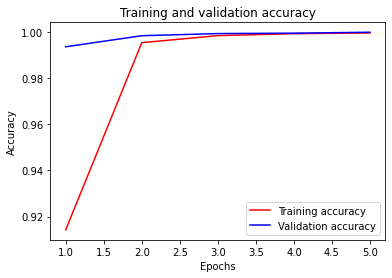

              precision    recall  f1-score   support

         0.0       0.53      0.91      0.67       231
         1.0       0.98      0.85      0.91      1260

    accuracy                           0.86      1491
   macro avg       0.76      0.88      0.79      1491
weighted avg       0.91      0.86      0.87      1491

Train on 22558 samples, validate on 22558 samples
Epoch 1/5
22558/22558 [==============================] - 9s 412us/step - loss: 0.2485 - accuracy: 0.8920 - val_loss: 0.0249 - val_accuracy: 0.9949
Epoch 2/5
22558/22558 [==============================] - 9s 400us/step - loss: 0.0187 - accuracy: 0.9957 - val_loss: 0.0072 - val_accuracy: 0.9989
Epoch 3/5
22558/22558 [==============================] - 9s 412us/step - loss: 0.0059 - accuracy: 0.9990 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 4/5
22558/22558 [==============================] - 9s 408us/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0015 - val_accuracy: 0.9997
Epoch 5/5
22558/22558 [============

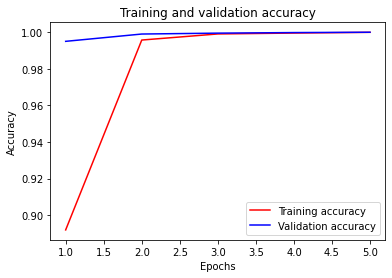

              precision    recall  f1-score   support

         0.0       0.53      0.93      0.68       231
         1.0       0.98      0.85      0.91      1260

    accuracy                           0.86      1491
   macro avg       0.76      0.89      0.80      1491
weighted avg       0.91      0.86      0.88      1491

Train on 22558 samples, validate on 22558 samples
Epoch 1/5
22558/22558 [==============================] - 9s 403us/step - loss: 0.2194 - accuracy: 0.9152 - val_loss: 0.0263 - val_accuracy: 0.9946
Epoch 2/5
22558/22558 [==============================] - 9s 406us/step - loss: 0.0192 - accuracy: 0.9958 - val_loss: 0.0099 - val_accuracy: 0.9990
Epoch 3/5
22558/22558 [==============================] - 9s 403us/step - loss: 0.0073 - accuracy: 0.9988 - val_loss: 0.0042 - val_accuracy: 0.9994
Epoch 4/5
22558/22558 [==============================] - 9s 400us/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0024 - val_accuracy: 0.9995
Epoch 5/5
22558/22558 [============

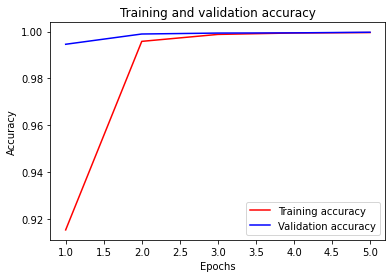

              precision    recall  f1-score   support

         0.0       0.51      0.94      0.66       231
         1.0       0.99      0.83      0.90      1260

    accuracy                           0.85      1491
   macro avg       0.75      0.89      0.78      1491
weighted avg       0.91      0.85      0.86      1491



In [75]:

#MODELING DATASET :: tf_data - deeplearning 

deep_learning(tf_train,train_y, tf_test , test_y)

#MODELING DATASET :: tfidf_data - deeplearning 

deep_learning(tfidf_train,train_y, tfidf_test , test_y)

#MODELING DATASET :: onehot_data - deeplearning 
deep_learning(onehot_train,train_y, onehot_test , test_y )


# **OVERSAMPLING:  DATA DUPLICATION**

**ML: BEST IS tf/onehot-NB::RESULTING .89**


---


**DL: BEST IS USING tf/tfidf encoding ::RESULTING .80**


BEST IS ORIGINAL DATASET!  

oversampled is better than undersampled data 

STICK TO ORIGINAL DATASET 


# ***TRY DIFFERENT PREPROCESSING***

In [0]:
# #before vectorizing data : preprocess 
# import nltk
# # nltk.download('all')

# from nltk import word_tokenize

# from nltk.corpus import stopwords

# from nltk import PorterStemmer
# from nltk import LancasterStemmer
# porter = nltk.PorterStemmer()
# lancaster = nltk.LancasterStemmer()

# from nltk.tokenize.treebank import TreebankWordDetokenizer
# tree = TreebankWordDetokenizer()
# import re 

# from nltk.corpus import wordnet

# def stem(word):
#   reg = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$'
#   stem, suffix = re.findall(reg,word)[0]
#   return stem 

# from nltk import WordNetLemmatizer
# wnl = WordNetLemmatizer()

# def preprocess_data(df):
#   """input:: input x dataset ,y dataset (combined dataset __ex: train )

#   output:: cleaned x dataset/label combined   """

#   x,y = split(df)

#   newx = []
#   for rownum,line in enumerate(x): #string data 
#     #make string with lower cases 
#     line = line.strip().lower()
#     # print(line)

#     #delete seperation in sentence 
#     line = re.sub(pattern = '\r*\n',repl=' ',string = line) 
#     # print('original: '+ line)

#     #delete sentence starting with one word 
#     line = re.sub(pattern = r'^[a-z]{1}\s',repl='',string = line)
#     # print('1: '+line)

#     # #delete info about height , weight , breast size
    
#     line = re.sub(pattern = r'\d\'\s*\d*[\"\']*',repl=' ',string = line)  #height 
#     line = re.sub(pattern = r'[01234567890]+\s{0,1}lbs{0,1}',repl=' ',string = line)  #weight 
#     line = re.sub(pattern = r'[01234567890]+\w', repl='',string =line ) #size
#     # print('2: '+line)

#     # #delete non-words
#     line = re.sub(pattern = r'[\W]',repl=' ',string = line) 
#     # print('3: '+line)
    
#     # #delete numbers : any digit
#     line = re.sub(pattern = r'[1234567890]+',repl=' ',string = line)
#     # print('4: '+line)
    

#     # delete one-letter
#     line = re.sub(pattern = r'\b[a-z]\b',repl=' ',string = line)
#     # print('5: '+line)

#     # delete two or more blank 
#     line = re.sub(pattern = r'\s{2,}',repl=' ',string = line)

#     # delete __
#     line = re.sub(pattern = r'_{1,}',repl=' ',string = line)
#     # print(line)

#     #stem words 
#     tokens = nltk.word_tokenize(line)
    
#     wordlist =[]
#     # repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
#     # match_substitution = r'\1\2\3'
#     for word in tokens:
#       # print('word before stemmed::  '+word )
      
#       # word = stem(word)
#       # print(word)
      
#       word = wnl.lemmatize(word, 'v')
#       # print('now word is...'+word)
#       # word = porter.stem(word)

#       # print('word after stemmed::  '+word )
#       # word = lancaster.stem(word)
#       #remove repeating characters 
#       # print(word)
#       # if not wordnet.synsets(word):
#         # word = repeat_pattern.sub(match_substitution, word)

#       # print('after repeat ' + word)

#       wordlist.append(word)

      
#     wordlist = set(wordlist) #remove duplicate words
#     # print(wordlist)

#     line = tree.detokenize(wordlist)
#     # print(line)
      


#     # print('6: '+line)
#     newx.append(line)
    


#   newx = pd.Series(newx) 
#   df = pd.concat([newx,y], axis =1)
#   df.rename(columns = {0: 'text'}, inplace = True)
  

#   return df #cleaned dataset combined with data,label 

# #example 

# clean_train =preprocess_data(train)
# clean_test =preprocess_data(test)

# #DIFFERENCE IN VECTORIZING DATASET 
# tf_train,train_y, tf_test , test_y = vectorize_data(clean_train,clean_test,'tf')
# tfidf_train,train_y, tfidf_test , test_y = vectorize_data(clean_train,clean_test,'tfidf')
# onehot_train,train_y, onehot_test , test_y = vectorize_data(clean_train,clean_test,'onehot')


# tf.get_feature_names()

In [0]:
# #MODELING DATASET :: tf_data 
# test_x, test_y, model =modeling_data(tf_train,train_y, tf_test , test_y,'nb')
# nb_tf = evaluate(test_x, test_y, model)

# test_x, test_y, model =modeling_data(tfidf_train,train_y, tfidf_test , test_y,'nb')
# lr_tf = evaluate(test_x, test_y, model)


# test_x, test_y, model =modeling_data(onehot_train,train_y, onehot_test , test_y,'nb')
# lr_tf = evaluate(test_x, test_y, model)


# # test_x, test_y, model =modeling_data(tf_train,train_y, tf_test , test_y,'svm')
# # svm_tf = evaluate(test_x, test_y, model)

# # deep_learning(tf_train,train_y, tf_test , test_y)


Stemming words (Porter):: .90 

Stemming words (lancaster):: .90

Remove repeating characters :: .89

Porter, charcter repeat :: .89

lancaster, charcter repeat :: .89

stem function:: .89

lemmitize:: .90

---

There is no big difference in stemming, removing the words ; use code as before 



# ***TRY DIFFERENT PARAMETERS FOR NB :: CHANGE alpha***

In [0]:
# #MODELING FUNCTION
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.linear_model import LogisticRegression
# from sklearn import metrics
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score, cross_val_predict
# from sklearn import svm



# #example 
# tfidf_train,train_y, tfidf_test, test_y = vectorize_data(clean_train,clean_test,'tfidf')

# def modeling_data(train_x, train_y, test_x, test_y,condition):
#   """input:: vectorized trainset of x,y, test set of each, condition will be machine learning techniques: naviebaye(nb), logistic regression(lr).. decision tree(dt)...

#   output:: f1_score """

#   #split dataset with validation dataset 
#   # train_x, val_x, train_y, val_y = train_test_split(train_x, train_y,train_size =.7 , random_state=123)
#   # print(train_x.shape)
#   # print(val_x.shape)
#   # print(train_y.shape)
#   # print(val_y.shape)

#   label_train = label_encoding(train_y) #1,0 presentation 
#   # label_train = label_encoding(val_y)  
#   label_test = label_encoding(test_y)

#   if condition == 'nb': #not need to be scaled 
#     clt = MultinomialNB(alpha= .35 ) #alpha: laplace smoothing 
#     clt.fit(train_x,label_train)
#     # print(cross_val_score(clt, train_x, train_y, cv=5).mean() )
#     # pred = clt.predict(test_x)
#     # f1 = metrics.f1_score(test_y,pred,average='macro') 
#     # print(classification_report(test_y, predictions))

#     return test_x, label_test , clt 

    

#   elif condition == 'lr': #lr needs to be scaled 
    
#     scaler = StandardScaler()
#     train_x = scaler.fit_transform(train_x)
#     test_x =scaler.fit_transform(test_x)

#     lr = LogisticRegression(max_iter=15000 )
#     lr.fit(train_x,label_train)
#     # pred = lr.predict(test_x)
#     # f1 = metrics.f1_score(label_test,pred,average='macro') 
#     # print(classification_report(test_y, predictions))
#     return test_x, label_test , lr #use labeled dataset 
 
#   #too much process needed ;; 

#   elif condition == 'svm': #needs to be scaled
#     scaler = StandardScaler() 
#     train_x = scaler.fit_transform(train_x)
#     test_x =scaler.fit_transform(test_x)

#     clf = svm.SVC()
#     clf.fit(train_x, label_train) #label train contains 0,1 
#     # pred = clf.predict(test_x)
#     # f1 = metrics.f1_score(label_test,pred,average='macro') 
#     # print(classification_report(test_y, predictions))

#     return test_x, label_test , clf




# #usage example 

# # print(modeling_data(tfidf_train,train_y, tfidf_test, test_y,'nb'))


In [0]:
# #example 

# clean_train =preprocess_data(train)
# clean_test =preprocess_data(test)

# #DIFFERENCE IN VECTORIZING DATASET 
# tf_train,train_y, tf_test , test_y = vectorize_data(clean_train,clean_test,'tf')
# tfidf_train,train_y, tfidf_test , test_y = vectorize_data(clean_train,clean_test,'tfidf')
# onehot_train,train_y, onehot_test , test_y = vectorize_data(clean_train,clean_test,'onehot')

# #MODELING DATASET :: tf_data 
# test_x, test_y, model =modeling_data(tf_train,train_y, tf_test , test_y,'nb')
# nb_tf = evaluate(test_x, test_y, model)

# test_x, test_y, model =modeling_data(tfidf_train,train_y, tfidf_test , test_y,'nb')
# lr_tf = evaluate(test_x, test_y, model)


# test_x, test_y, model =modeling_data(onehot_train,train_y, onehot_test , test_y,'nb')
# lr_tf = evaluate(test_x, test_y, model)
# #

# # test_x, test_y, model =modeling_data(tf_train,train_y, tf_test , test_y,'svm')
# # svm_tf = evaluate(test_x, test_y, model)

# # deep_learning(onehot_train,train_y, onehot_test , test_y )


alpha change::  better as lower :: .35-> .91

# ***TRY DIFFERENT PARAMETERS FOR DL :: CHANGE layer, optimizer***

In [0]:
# #USE DEEPLEARNING 
# # !pip install keras
# from sklearn.metrics import classification_report

# #since binary classification last node needs to be sigmoid 
# from keras import models
# from keras import layers

# def deep_learning(train_x,train_y, test_x, test_y):

#   label_train = label_encoding(train_y) #1,0 presentation 
#   label_test = label_encoding(test_y)
#   label_train = np.asarray(label_train).astype('float32')
#   label_test = np.asarray(label_test).astype('float32')

#   #scale dataset 
#   scaler = StandardScaler()
#   train_x = scaler.fit_transform(train_x)
#   test_x =scaler.fit_transform(test_x)


#   num = int(train_x.shape[0])
#   x_val = train_x[-num:]
#   y_val = label_train[-num:]
#   x_train = train_x[:-num]
#   y_train = label_train[:-num]

#   # opt = ['adadelta','adam', 'rmsprop', 'adagrad']
  
#   # for opt in opt: 
#   #   model = models.Sequential()
  
#   #   model.add(layers.Dense(500, activation = 'relu', input_shape = (train_x.shape[1],))) #input layer :needs specific input_shape 
#   #   model.add(layers.Dense(100,activation='relu')) #hidden layer using relu 
#   #   model.add(layers.Dense(10,activation='relu')) #hidden layer using relu 
#   #   model.add(layers.Dense(1,activation = 'sigmoid')) #output layer(binary  1): using sigmoid 0 or 1 

  
#   #   model.compile(optimizer = opt, loss= 'binary_crossentropy', metrics =['accuracy'])

#   #   history = model.fit(train_x, label_train, epochs=15, batch_size= 512, validation_data=(x_val, y_val) )

#   # for batch in [64,128,512]:
#   #   model = models.Sequential()
  
#   #   model.add(layers.Dense(500, activation = 'relu', input_shape = (train_x.shape[1],))) #input layer :needs specific input_shape 
#   #   model.add(layers.Dense(100,activation='relu')) #hidden layer using relu 
#   #   model.add(layers.Dense(10,activation='relu')) #hidden layer using relu 
#   #   model.add(layers.Dense(1,activation = 'sigmoid')) #output layer(binary  1): using sigmoid 0 or 1 
#   #   model.compile(optimizer = 'adadelta', loss= 'binary_crossentropy', metrics =['accuracy'])
#   #   history = model.fit(train_x, label_train, epochs=15, batch_size= batch, validation_data=(x_val, y_val) )


#   for epoch in [5,10,15,20]:
#     model = models.Sequential()
  
#     model.add(layers.Dense(500, activation = 'relu', input_shape = (train_x.shape[1],))) #input layer :needs specific input_shape 
#     model.add(layers.Dense(100,activation='relu')) #hidden layer using relu 
#     model.add(layers.Dense(10,activation='relu')) #hidden layer using relu 
#     model.add(layers.Dense(1,activation = 'sigmoid')) #output layer(binary  1): using sigmoid 0 or 1 
#     model.compile(optimizer = 'adadelta', loss= 'binary_crossentropy', metrics =['accuracy'])
#     history = model.fit(train_x, label_train, epochs=epoch, batch_size= 128, validation_data=(x_val, y_val) )




#   # history_dict = history.history
#   # history_dict.keys()
#   # acc= history.history['accuracy']
#   # val_acc = history.history['val_accuracy']
#   # loss = history.history['loss']
#   # val_loss = history.history['val_loss']
#   # epochs = range(1,len(acc)+1)
#   # plt.plot(epochs, acc, 'r', label = 'Training accuracy')
#   # plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
#   # plt.title('Training and validation accuracy')
#   # plt.xlabel('Epochs')
#   # plt.ylabel('Accuracy')
#   # plt.legend()

#   # plt.show()


#     prediction_y = model.predict_classes(test_x, verbose= 0) 
#   #  print(prediction_y)
#   #   print('the optimizer is..' +str(opt))
#     # print('the batch is..' + str(batch))
#     print('the epoch is..' + str(epoch))
#     print(classification_report(label_test, prediction_y)) 


#   # return classification_report(label_test, prediction_y)

# #example :: 
# deep_learning(onehot_train,train_y, onehot_test , test_y )

before 'adam' :: .83 -> change of optimizer to adadelta .87

before 'batch_size :512 -> 512 is best ::same .87   

before epoch :: 15 .87 -> 5 is .88

In [0]:

# #MODELING FUNCTION
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.linear_model import LogisticRegression
# from sklearn import metrics
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score, cross_val_predict
# from sklearn.svm import LinearSVC



# #example 
# # tfidf_train,train_y, tfidf_test, test_y = vectorize_data(clean_train,clean_test,'tfidf')

# def modeling_data(train_x, train_y, test_x, test_y,condition):
#   """input:: vectorized trainset of x,y, test set of each, condition will be machine learning techniques: naviebaye(nb), logistic regression(lr).. decision tree(dt)...

#   output:: f1_score """

#   #split dataset with validation dataset 
#   # train_x, val_x, train_y, val_y = train_test_split(train_x, train_y,train_size =.7 , random_state=123)
#   # print(train_x.shape)
#   # print(val_x.shape)
#   # print(train_y.shape)
#   # print(val_y.shape)

#   label_train = label_encoding(train_y) #1,0 presentation 
#   # label_train = label_encoding(val_y)  
#   label_test = label_encoding(test_y)

#   if condition == 'nb': #not need to be scaled 
#     clt = MultinomialNB( alpha = .35)
#     clt.fit(train_x,label_train)
#     # print(cross_val_score(clt, train_x, train_y, cv=5).mean() )
#     # pred = clt.predict(test_x)
#     # f1 = metrics.f1_score(test_y,pred,average='macro') 
#     # print(classification_report(test_y, predictions))

#     return test_x, label_test , clt 

    

#   elif condition == 'lr': #lr needs to be scaled 
    
#     scaler = StandardScaler()
#     train_x = scaler.fit_transform(train_x)
#     test_x =scaler.fit_transform(test_x)

#     lr = LogisticRegression(max_iter=15000 )
#     lr.fit(train_x,label_train)
#     # pred = lr.predict(test_x)
#     # f1 = metrics.f1_score(label_test,pred,average='macro') 
#     # print(classification_report(test_y, predictions))
#     return test_x, label_test , lr #use labeled dataset 
 
#   #too much process needed ;; 

  

#   elif condition == 'svm': #needs to be scaled
    
#     scaler = StandardScaler() 
#     train_x = scaler.fit_transform(train_x)
#     test_x =scaler.fit_transform(test_x)
#     C = [0.01, 0.1,1,10]
#     for c in C:
#       print('----------------------------')
#       clf = LinearSVC(C=c)
#       clf.fit(train_x, label_train) #label train contains 0,1 
#       predictions = clf.predict(test_x)
#     # f1 = metrics.f1_score(label_test,pred,average='macro') 
#       print('C is...' +str(c))
#       print(classification_report(label_test, predictions))
      


#     return test_x, label_test , clf




# #usage example 

# print(modeling_data(tfidf_train,train_y, tfidf_test, test_y,'nb'))


In [78]:
#no preprocessing 
#example 

clean_train =train
clean_test =test

#DIFFERENCE IN VECTORIZING DATASET 
tf_train,train_y, tf_test , test_y = vectorize_data(clean_train,clean_test,'tf')
tfidf_train,train_y, tfidf_test , test_y = vectorize_data(clean_train,clean_test,'tfidf')
onehot_train,train_y, onehot_test , test_y = vectorize_data(clean_train,clean_test,'onehot')

# MODELING DATASET :: tf_data 
test_x, test_y, model =modeling_data(tf_train,train_y, tf_test , test_y,'nb')
nb_tf = evaluate(test_x, test_y, model)

# test_x, test_y, model =modeling_data(tfidf_train,train_y, tfidf_test , test_y,'nb')
# lr_tf = evaluate(test_x, test_y, model)


# test_x, test_y, model =modeling_data(onehot_train,train_y, onehot_test , test_y,'nb')
# lr_tf = evaluate(test_x, test_y, model)

# 
# test_x, test_y, model =modeling_data(tf_train,train_y, tf_test , test_y,'svm')
# svm_tf = evaluate(test_x, test_y, model)
#
# deep_learning(onehot_train,train_y, onehot_test , test_y )


              precision    recall  f1-score   support

           0       0.84      0.84      0.84       231
           1       0.97      0.97      0.97      1260

    accuracy                           0.95      1491
   macro avg       0.90      0.90      0.90      1491
weighted avg       0.95      0.95      0.95      1491



**ML ; NAIVE BAYES : BEST .91**

DEEP LEARNING : BEST .88 
